# Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv(os.path.join(r'C:\Users\iNDIA\Desktop\Career Foundry\6 Advanced Analytics & Dashboard Design\6.1 Sourcing Open Data\World Happiness Report\WHR.csv'))

In [4]:
df.shape

(2128, 12)

In [5]:
df.head()

,Unnamed: 0,Country name,Country Code,Regional Indicator,year,Happiness Score,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,0,Afghanistan,AFG,South Asia,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882
1,1,Afghanistan,AFG,South Asia,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850
2,2,Afghanistan,AFG,South Asia,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707
3,3,Afghanistan,AFG,South Asia,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731
4,4,Afghanistan,AFG,South Asia,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776


In [6]:
df.isnull().sum()
#Checking for missing value

Unnamed: 0                          0
Country name                        0
Country Code                        0
Regional Indicator                  0
year                                0
Happiness Score                     0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
dtype: int64

In [7]:
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [8]:
df.head()

,Country name,Country Code,Regional Indicator,year,Happiness Score,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,AFG,South Asia,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882
1,Afghanistan,AFG,South Asia,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850
2,Afghanistan,AFG,South Asia,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707
3,Afghanistan,AFG,South Asia,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731
4,Afghanistan,AFG,South Asia,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776


### Elbow Technique

In [9]:
# Since our dataset has categorical variables as well, we will be 
#creating another dataset with only numerical variables for elbow technique
df_cluster = df[['Happiness Score', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth','Freedom to make life choices', 'Generosity','Perceptions of corruption']]

In [10]:
num_cl = range(1,10) #define the range of potential clusters in the data
kmeans = [KMeans(n_clusters = i) for i in num_cl] #defines k-means clusters
# in the range we assigned above

In [12]:
score = [kmeans[i].fit(df_cluster).score(df_cluster) for i in range(len(kmeans))]
#create a score that represnts a rate of 
#variation for given cluster option

score

[-659675.7906843829,
 -110737.99835230011,
 -33641.75303278681,
 -18144.30408471465,
 -10892.52226416803,
 -7673.1729460819515,
 -6180.56909841697,
 -5069.634079354111,
 -4451.351156446277]

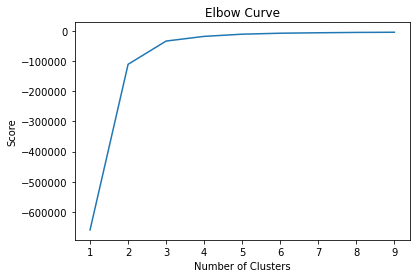

In [13]:
# Plot the elbow curve using PyLab

pl.plot(num_cl, score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

##### No. of clusters - 3

### k-means Clustering

In [14]:
#Create the k-means object

kmeans = KMeans(n_clusters = 3, n_jobs = -1)

In [15]:
# Fit the k-means object to the data
kmeans.fit(df_cluster)

C:\Users\iNDIA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [16]:
# viewing clusters
df_cluster['clusters'] = kmeans.fit_predict(df_cluster)

C:\Users\iNDIA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\iNDIA\AppData\Local\Temp/ipykernel_12048/51646725.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['clusters'] = kmeans.fit_predict(df_cluster)


In [17]:
df_cluster.head()

,Happiness Score,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,clusters
0,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0
1,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0
2,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0
3,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0
4,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0


In [18]:
df_cluster['clusters'].value_counts()

2    1376
0     606
1     146
Name: clusters, dtype: int64

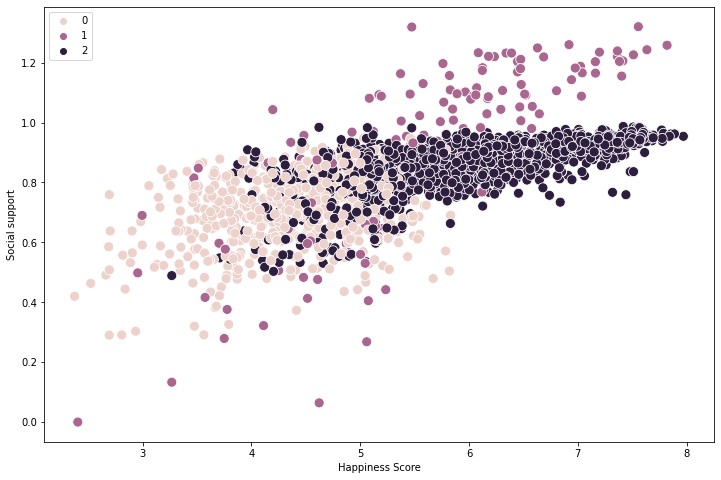

In [19]:
# Plot the clusters for the "Happiness Score" and "Social Support" variable

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cluster['Happiness Score'], y=df_cluster['Social support'], hue =kmeans.labels_, s = 100)

ax.grid(False)
plt.xlabel('Happiness Score')
plt.ylabel('Social support')
plt.show()

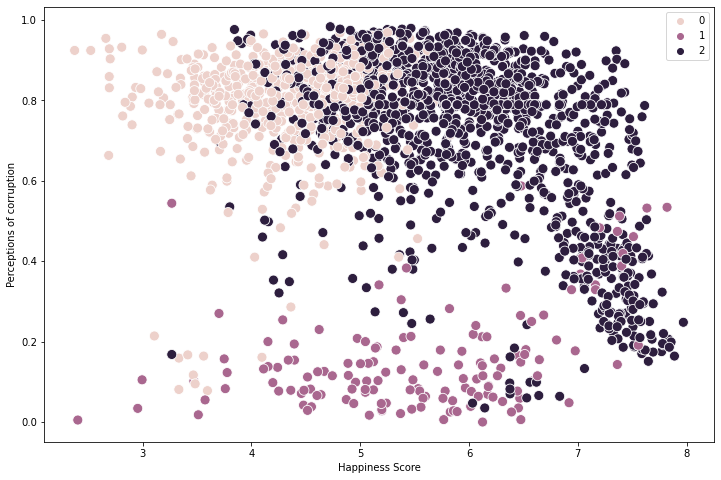

In [20]:
# Plotting the cluster for 'Happiness Score' and 'Perceptions of corruption'

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cluster['Happiness Score'], y=df_cluster['Perceptions of corruption'], hue = kmeans.labels_, s= 100)

ax.grid(False)
plt.xlabel('Happiness Score')
plt.ylabel('Perceptions of corruption')
plt.show()

In [21]:
# Grouping the Data

df_cluster.loc[df_cluster['clusters'] == 2, 'cluster'] = 'dark purple'
df_cluster.loc[df_cluster['clusters'] == 1, 'cluster'] = 'purple'
df_cluster.loc[df_cluster['clusters'] == 0, 'cluster'] = 'pink'


C:\Users\iNDIA\anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\iNDIA\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [22]:
df_cluster.groupby('cluster').agg({'Happiness Score':['mean', 'median'], 
                                   'Social support': ['mean', 'median'],
                                   'Log GDP per capita': ['mean', 'median'],
                                  'Perceptions of corruption':['mean', 'median']})

Happiness Score         Social support         Log GDP per capita  \
                       mean  median           mean  median               mean   
cluster                                                                         
dark purple        5.949081  5.9295       0.856297  0.8770           9.929114   
pink               4.383652  4.4240       0.707069  0.7255           8.125218   
purple             5.553575  5.5685       0.905863  0.9575           1.410445   

                    Perceptions of corruption          
             median                      mean  median  
cluster                                                
dark purple  9.9400                  0.728444  0.7890  
pink         8.0415                  0.791861  0.8140  
purple       1.4455                  0.154781  0.1195

#### Some findings
Different clusters have different stats in terms of Happiness Score, Social Support and Perception of Corruption
Happiness Score and Log GDP per capita is highest among the pink cluster, while Purple is highest in the social support cluster and Perception of Corruption is highest in the dark purple cluster.

We can see the country with a higher Log GDP per capita median has a higher Happiness Score as well 

The Social support is highest in the purple cluster although the Happiness Score isn't highest within that color cluster